# Модели стохастических объектов (методы анализа данных) 
## Практическая работа №1
### КИ18-16 Прекель В.А.

Используются `matplotlib`, `numpy`, `pandas`, `seaborn`, `sklearn`

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

#### Подготовка

Считывает данные, сгенерированные в `Lab01Scrapper.ipynb`

In [50]:
data = pd.read_json("memeblog.json")
data

,OwnerId,Id,Date,AttachmentTypes,Comments,Likes,Reposts,Views,FromId,PostSource,PostType,SignerId
0,-120075923,1,2016-04-23 18:49:13+00:00,[photo],28,61,1,NaN,-120075923,api,post,NaN
1,-120075923,2,2016-04-23 19:18:26+00:00,[photo],1,122,2,NaN,-120075923,api,post,NaN
2,-120075923,3,2016-04-23 19:35:32+00:00,[photo],0,225,9,NaN,-120075923,api,post,NaN
3,-120075923,4,2016-04-23 19:35:39+00:00,[photo],9,38,0,NaN,-120075923,api,post,NaN
4,-120075923,7,2016-04-23 20:24:46+00:00,[],9,45,0,NaN,-120075923,vk,post,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
38886,-120075923,785521,2021-02-22 11:10:42+00:00,[video],39,427,451,12996.0,-120075923,vk,post,NaN
38887,-120075923,785563,2021-02-22 11:30:02+00:00,[video],22,293,56,8832.0,-120075923,vk,post,383504879.0
38888,-120075923,785614,2021-02-22 12:00:10+00:00,[doc],13,613,529,8418.0,-120075923,vk,post,254695646.0
38889,-120075923,785646,2021-02-22 12:30:02+00:00,[video],23,403,115,8896.0,-120075923,vk,post,100021661.0


#### Графики

График распределения по просмотрам

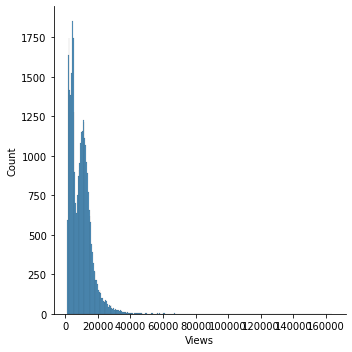

In [51]:
sns.displot(data.Views)

Круговая диаграмма по типу вложения

<AxesSubplot:ylabel='AttachmentTypes'>

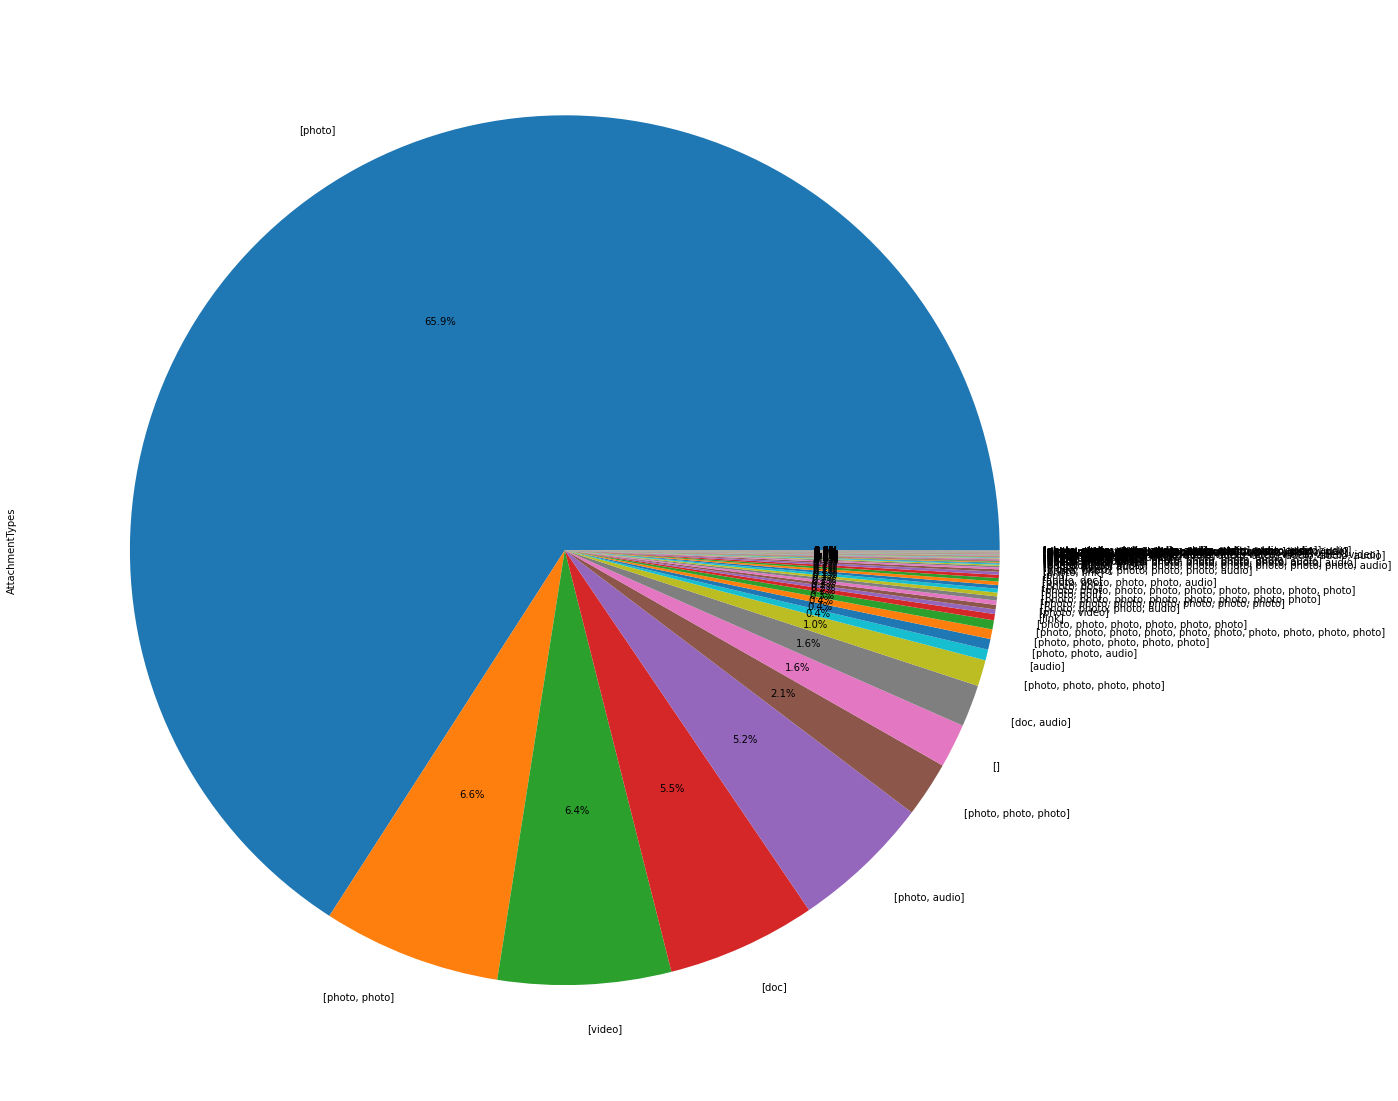

In [52]:
plt.figure(figsize=(20, 20))
data.AttachmentTypes.value_counts().plot.pie(autopct='%1.1f%%')

Добавляем колонку `DateWithoutTime` в которой записан год и месяц

In [55]:
data["DateWithoutTime"] = pd.to_datetime(data.Date).dt.strftime('%Y %h')

Boxplot для лайков по месяцам

<AxesSubplot:xlabel='DateWithoutTime', ylabel='Likes'>

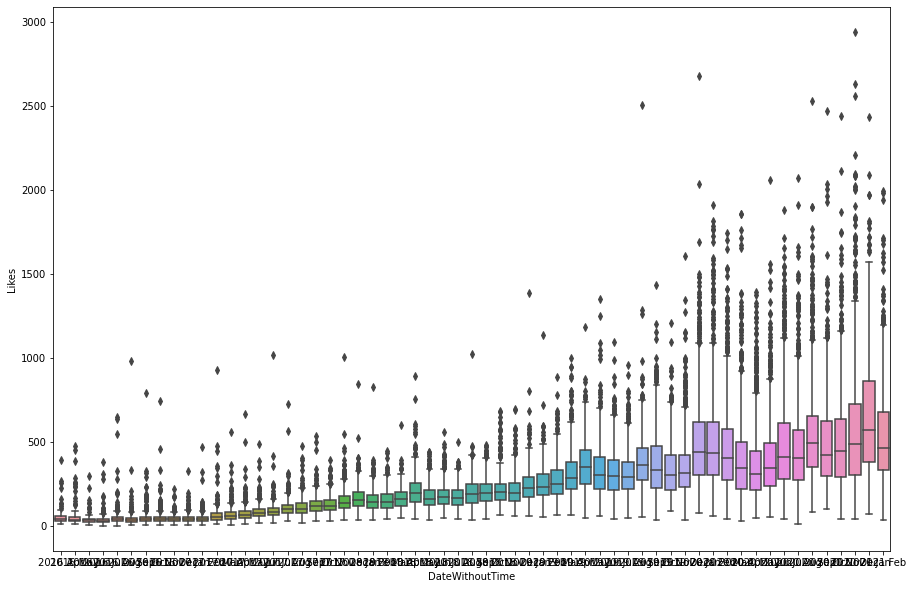

In [56]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="DateWithoutTime", y="Likes", data = data)

Boxplot для просмотров по месяцам (видно, что просмотры в ВК появились с самого начала 2017 года)

<AxesSubplot:xlabel='DateWithoutTime', ylabel='Views'>

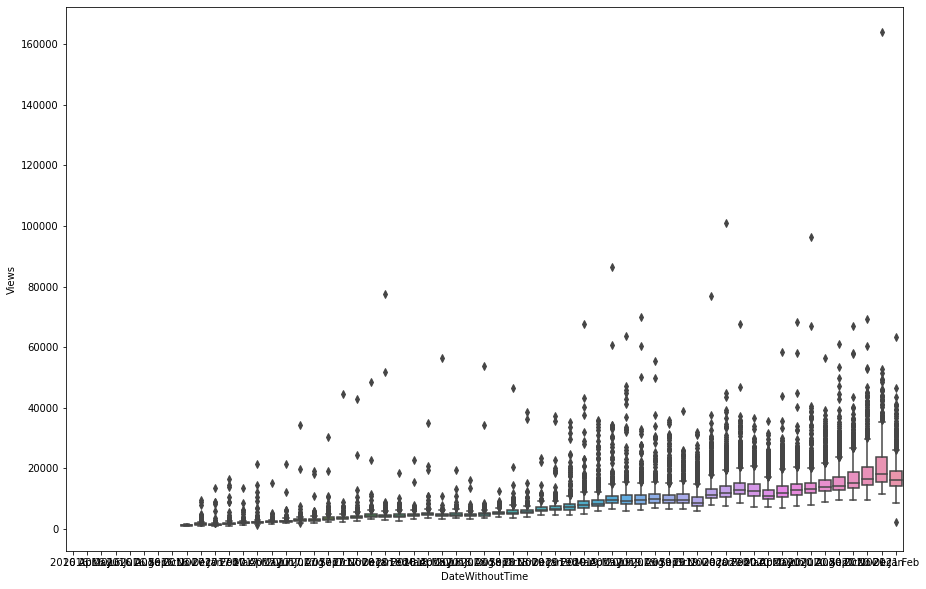

In [57]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="DateWithoutTime", y="Views", data = data)

Boxplot для комментариев  по месяцам

<AxesSubplot:xlabel='DateWithoutTime', ylabel='Comments'>

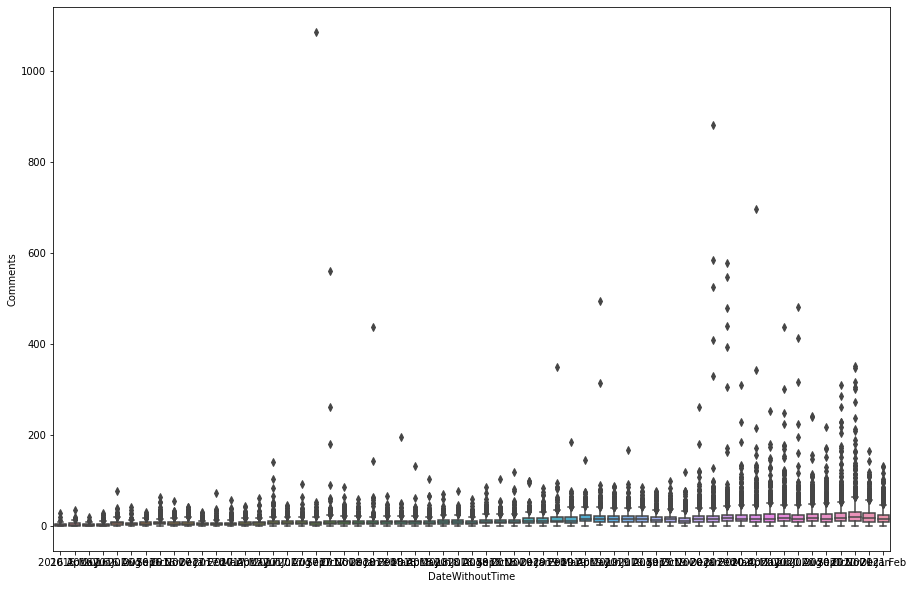

In [58]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="DateWithoutTime", y="Comments", data = data)

#### Не графики

Среднее (матожидание) кол-во комментариев

In [59]:
np.mean(data.Comments)

14.763698542079144

Медиана кол-ва комментариев

In [60]:
np.median(data.Comments)

11.0

Дисперсия кол-ва комментариев

In [61]:
np.var(data.Comments)

410.8780537811244

Среднеквадратичное отклонение кол-ва комментариев

In [62]:
np.std(data.Comments)

20.270127127897457

Квантили 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999 по кол-ву комментариев

In [63]:
q = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999]

[np.quantile(data.Comments, i) for i in q]

[6.0, 11.0, 18.0, 29.0, 39.0, 76.0, 241.22000000000116]

Нормализация комментариев

In [64]:
preprocessing.normalize([data.Comments])

array([[0.00566189, 0.00020221, 0.        , ..., 0.00262874, 0.00465084,
        0.00161768]])

Стандартизация комментариев

In [65]:
preprocessing.scale(data.Comments)

array([ 0.65299548, -0.67901392, -0.7283476 , ..., -0.08700974,
        0.40632707, -0.33367815])